<a href="https://colab.research.google.com/github/Gla2023/TrabajofinalCalculonumerico/blob/main/Trabajo_final_Calculo_num%C3%A9rico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

METODO DE LA BISECCIÓN


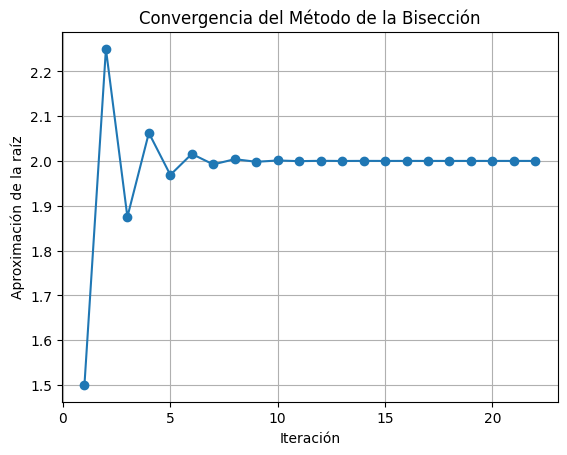

Cantidad de iteraciones: 22
Aproximación de la raíz: 2.000000238418579


In [13]:
import matplotlib.pyplot as plt

def bisection(f, a, b, tol=1e-6, max_iter=100):
    if f(a) * f(b) >= 0:
        raise Exception("La función no cumple con el teorema del valor intermedio en el intervalo dado.")

    # Listas para almacenar datos de las iteraciones
    iteraciones = []
    aproximaciones = []

    for i in range(max_iter):
        x = (a + b) / 2
        iteraciones.append(i + 1)
        aproximaciones.append(x)

        if abs(f(x)) < tol:
            # Graficar las iteraciones
            plt.plot(iteraciones, aproximaciones, marker='o')
            plt.xlabel('Iteración')
            plt.ylabel('Aproximación de la raíz')
            plt.title('Convergencia del Método de la Bisección')
            plt.grid(True)
            plt.show()

            return x, iteraciones, aproximaciones

        if f(x) * f(a) < 0:
            b = x
        else:
            a = x

    # Graficar las iteraciones si no converge
    plt.plot(iteraciones, aproximaciones, marker='o')
    plt.xlabel('Iteración')
    plt.ylabel('Aproximación de la raíz')
    plt.title('Convergencia del Método de la Bisección')
    plt.grid(True)
    plt.show()

    raise Exception("El método de la bisección no convergió después de {} iteraciones.".format(max_iter))

# Ejemplo de uso
def ejemplo_funcion(x):
    return x**2 - 4

# Cálculo de la cantidad de iteraciones
raiz, iteraciones, aproximaciones = bisection(ejemplo_funcion, 0, 3)
iteraciones_cantidad = len(iteraciones)
print("Cantidad de iteraciones:", iteraciones_cantidad)
print("Aproximación de la raíz:", raiz)



METODO DE LA SECANTE


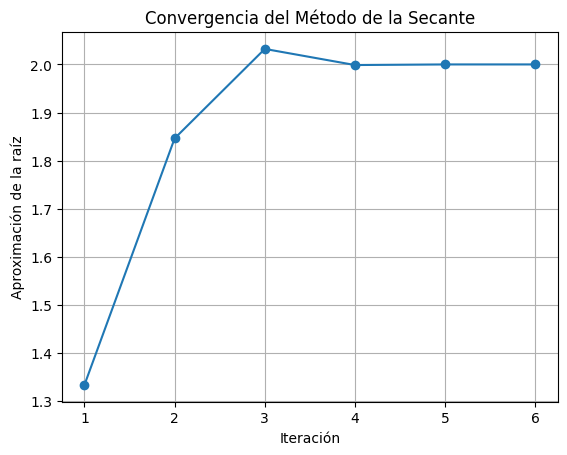

Aproximación de la raíz: 2.0000000032768
Cantidad de iteraciones: 7


In [14]:
import matplotlib.pyplot as plt

def secant_method(func, x0, x1, tol=1e-6, max_iter=100):
    """
    Método de la secante para encontrar la raíz de una función.

    Args:
        func (function): La función para la cual queremos encontrar la raíz.
        x0 (float): Primer punto inicial.
        x1 (float): Segundo punto inicial.
        tol (float): Tolerancia para la convergencia (opcional).
        max_iter (int): Número máximo de iteraciones (opcional).

    Returns:
        float: La aproximación de la raíz de la función.
        int: La cantidad de iteraciones realizadas.
    """
    iter_count = 0
    iteraciones = []
    aproximaciones = []

    while iter_count < max_iter:
        fx0 = func(x0)
        fx1 = func(x1)

        if abs(fx1) < tol:
            # Graficar las iteraciones
            plt.plot(iteraciones, aproximaciones, marker='o')
            plt.xlabel('Iteración')
            plt.ylabel('Aproximación de la raíz')
            plt.title('Convergencia del Método de la Secante')
            plt.grid(True)
            plt.show()

            return x1, iter_count + 1  # +1 para contar la iteración actual

        x_next = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        iter_count += 1

        # Actualizar listas para la gráfica
        iteraciones.append(iter_count)
        aproximaciones.append(x_next)

        x0, x1 = x1, x_next

    # Graficar las iteraciones si no converge
    plt.plot(iteraciones, aproximaciones, marker='o')
    plt.xlabel('Iteración')
    plt.ylabel('Aproximación de la raíz')
    plt.title('Convergencia del Método de la Secante')
    plt.grid(True)
    plt.show()

    raise Exception("El método de la secante no convergió después de {} iteraciones.".format(max_iter))

# Ejemplo de uso
def ejemplo_funcion(x):
    return x**2 - 4

raiz_secante, iteraciones_secante = secant_method(ejemplo_funcion, 0, 3)
print("Aproximación de la raíz:", raiz_secante)
print("Cantidad de iteraciones:", iteraciones_secante)


METODO DE NEWTON RAPHSON


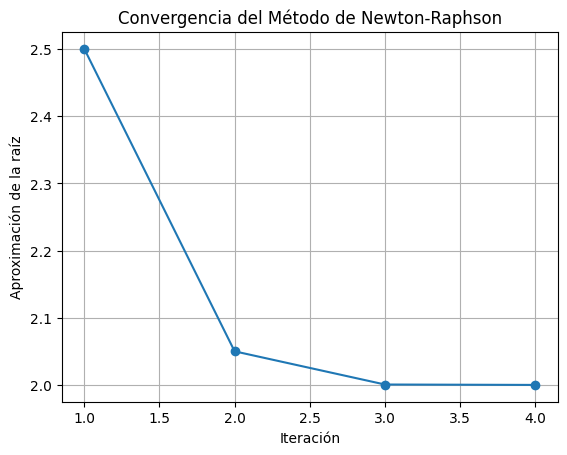

Aproximación de la raíz: 2.00000009292229
Cantidad de iteraciones: 5


In [15]:
import sympy as sp
import matplotlib.pyplot as plt

def newton_raphson(func, x0, tol=1e-6, max_iter=100):
    """
    Método de Newton-Raphson para encontrar la raíz de una función.

    Args:
        func (sympy.Function): La función para la cual queremos encontrar la raíz.
        x0 (float): Punto inicial.
        tol (float): Tolerancia para la convergencia (opcional).
        max_iter (int): Número máximo de iteraciones (opcional).

    Returns:
        float: La aproximación de la raíz.
        int: La cantidad de iteraciones realizadas.
    """
    x = sp.symbols('x')
    f_prime = sp.diff(func, x)

    iteration = 0
    iteraciones = []
    aproximaciones = []

    while iteration < max_iter:
        fx = func.subs(x, x0)
        f_prime_x = f_prime.subs(x, x0)

        if abs(fx) < tol:
            # Graficar las iteraciones
            plt.plot(iteraciones, aproximaciones, marker='o')
            plt.xlabel('Iteración')
            plt.ylabel('Aproximación de la raíz')
            plt.title('Convergencia del Método de Newton-Raphson')
            plt.grid(True)
            plt.show()

            return x0, iteration + 1  # +1 para contar la iteración actual

        x1 = x0 - fx / f_prime_x

        # Actualizar listas para la gráfica
        iteraciones.append(iteration + 1)
        aproximaciones.append(x1)

        if abs(x1 - x0) < tol:
            # Graficar las iteraciones
            plt.plot(iteraciones, aproximaciones, marker='o')
            plt.xlabel('Iteración')
            plt.ylabel('Aproximación de la raíz')
            plt.title('Convergencia del Método de Newton-Raphson')
            plt.grid(True)
            plt.show()

            return x1, iteration + 1

        x0 = x1
        iteration += 1

    # Graficar las iteraciones si no converge
    plt.plot(iteraciones, aproximaciones, marker='o')
    plt.xlabel('Iteración')
    plt.ylabel('Aproximación de la raíz')
    plt.title('Convergencia del Método de Newton-Raphson')
    plt.grid(True)
    plt.show()

    raise ValueError("El método de Newton-Raphson no convergió en el número máximo de iteraciones.")

# Ejemplo de uso
if __name__ == "__main__":
    # Define la función f(x)
    x = sp.symbols('x')
    f = x**2 - 4

    # Punto inicial
    x0 = 1.0

    # Llama al método de Newton-Raphson
    root, iterations = newton_raphson(f, x0)

    # Imprime el resultado
    print(f"Aproximación de la raíz: {root}")
    print(f"Cantidad de iteraciones: {iterations}")


METODO DEL PUNTO FIJO:g(x)= Raíz de x+4, que es derivada de la función (x) a la
=xelevado2−4


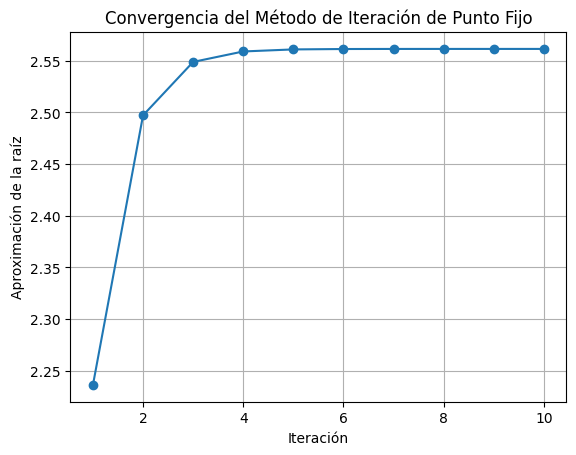

Aproximación de la raíz: 2.56155267680617
Cantidad de iteraciones: 10


In [17]:
import sympy as sp
import matplotlib.pyplot as plt

def fixed_point_iteration(g, x0, tol=1e-6, max_iter=100):
    """
    Método de iteración de punto fijo para encontrar la raíz de una función.

    Args:
        g (sympy.Function): La función de iteración (punto fijo).
        x0 (float): Punto inicial.
        tol (float): Tolerancia para la convergencia (opcional).
        max_iter (int): Número máximo de iteraciones (opcional).

    Returns:
        float: La aproximación de la raíz.
        int: La cantidad de iteraciones realizadas.
    """
    x = sp.symbols('x')

    iteration = 0
    iteraciones = []
    aproximaciones = []

    while iteration < max_iter:
        x1 = g.subs(x, x0)

        # Actualizar listas para la gráfica
        iteraciones.append(iteration + 1)
        aproximaciones.append(x1)

        if abs(x1 - x0) < tol:
            # Graficar las iteraciones
            plt.plot(iteraciones, aproximaciones, marker='o')
            plt.xlabel('Iteración')
            plt.ylabel('Aproximación de la raíz')
            plt.title('Convergencia del Método de Iteración de Punto Fijo')
            plt.grid(True)
            plt.show()

            return x1, iteration + 1

        x0 = x1
        iteration += 1

    # Graficar las iteraciones si no converge
    plt.plot(iteraciones, aproximaciones, marker='o')
    plt.xlabel('Iteración')
    plt.ylabel('Aproximación de la raíz')
    plt.title('Convergencia del Método de Iteración de Punto Fijo')
    plt.grid(True)
    plt.show()

    raise ValueError("El método de Iteración de Punto Fijo no convergió en el número máximo de iteraciones.")

# Ejemplo de uso
if __name__ == "__main__":
    # Define la función de iteración (punto fijo)
    x = sp.symbols('x')
    g = sp.sqrt(x + 4)  # Puedes ajustar esta función de iteración según tus necesidades

    # Punto inicial
    x0 = 1.0

    # Llama al método de Iteración de Punto Fijo
    root, iterations = fixed_point_iteration(g, x0)

    # Imprime el resultado
    print(f"Aproximación de la raíz: {root}")
    print(f"Cantidad de iteraciones: {iterations}")


METODO DE REGULA FALSI

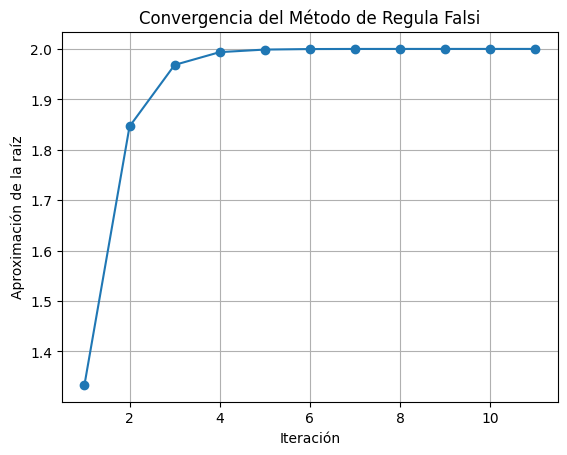

Aproximación de la raíz: 1.9999999180800017
Cantidad de iteraciones: 11


In [1]:
import matplotlib.pyplot as plt

def regula_falsi(f, a, b, tol=1e-6, max_iter=100):
    """
    Método de la regula falsi para encontrar la raíz de una función.

    Args:
    f (function): La función para la cual se busca la raíz.
    a (float): Extremo izquierdo del intervalo inicial.
    b (float): Extremo derecho del intervalo inicial.
    tol (float): Tolerancia para la convergencia (opcional).
    max_iter (int): Número máximo de iteraciones (opcional).

    Returns:
    float: La aproximación de la raíz.
    int: La cantidad de iteraciones realizadas.
    """

    iter_count = 0
    iteraciones = []
    aproximaciones = []

    while iter_count < max_iter:
        fa = f(a)
        fb = f(b)

        if abs(fa - fb) < tol:
            raise ValueError("División por cero en el método de regula falsi. Intervalo demasiado pequeño.")

        x = (a * fb - b * fa) / (fb - fa)

        iter_count += 1

        # Actualizar listas para la gráfica
        iteraciones.append(iter_count)
        aproximaciones.append(x)

        if abs(f(x)) < tol:
            # Graficar las iteraciones
            plt.plot(iteraciones, aproximaciones, marker='o')
            plt.xlabel('Iteración')
            plt.ylabel('Aproximación de la raíz')
            plt.title('Convergencia del Método de Regula Falsi')
            plt.grid(True)
            plt.show()

            return x, iter_count

        if f(x) * fa < 0:
            b = x
        else:
            a = x

    # Graficar las iteraciones si no converge
    plt.plot(iteraciones, aproximaciones, marker='o')
    plt.xlabel('Iteración')
    plt.ylabel('Aproximación de la raíz')
    plt.title('Convergencia del Método de Regula Falsi')
    plt.grid(True)
    plt.show()

    raise ValueError("El método de Regula Falsi no convergió en el número máximo de iteraciones.")

# Ejemplo de uso
def ejemplo_funcion(x):
    return x**2 - 4

# Definir intervalo inicial
a = 0
b = 3

# Llama al método de Regula Falsi
raiz_regula_falsi, iteraciones_regula_falsi = regula_falsi(ejemplo_funcion, a, b)
print("Aproximación de la raíz:", raiz_regula_falsi)
print("Cantidad de iteraciones:", iteraciones_regula_falsi)
